Artur Kozubov, Kirill Komarov 54 Dataset.

## Phase 1

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

### 1.1

#### 1.1.A Analysis of data structures such as files, records.

In [213]:
connections = pd.read_csv(f'./data/connections.csv', delimiter='\t')
connections.info()
connections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15155 non-null  object 
 1   imei               15155 non-null  int64  
 2   mwra               15155 non-null  float64
 3   c.katana           15155 non-null  float64
 4   c.dogalize         15155 non-null  float64
 5   c.android.youtube  15155 non-null  float64
 6   c.android.chrome   15155 non-null  float64
 7   c.android.gm       15155 non-null  float64
 8   c.raider           15155 non-null  float64
 9   c.UCMobile.x86     15155 non-null  float64
 10  c.updateassist     15155 non-null  float64
 11  c.UCMobile.intl    15155 non-null  float64
 12  c.android.vending  15155 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,c.updateassist,c.UCMobile.intl,c.android.vending
0,2018-05-05 10:00:00,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,62.35464,72.81987,11.24912
1,2018-05-05 10:01:00,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,64.58400,9.11802,31.03623
2,2018-05-05 10:02:00,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,23.34476,86.06474,45.28060
3,2018-05-05 10:03:00,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,37.14845,91.60321,64.76852
4,2018-05-05 10:04:00,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,68.27938,89.99798,15.42470


In [214]:
devices = pd.read_csv(f'./data/devices.csv', delimiter='\t')
devices.info()
devices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2975 non-null   float64
 1   longitude   2975 non-null   float64
 2   store_name  2975 non-null   object 
 3   code        2968 non-null   object 
 4   location    2975 non-null   object 
 5   imei        2975 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 139.6+ KB


,latitude,longitude,store_name,code,location,imei
0,61.78491,34.34691,Petrozavodsk,RU,Europe/Moscow,3590433799317661040
1,28.98002,77.70636,Meerut,IN,Asia/Kolkata,3590433799317661263
2,23.90280,89.11943,Kushtia,BD,Asia/Dhaka,359043379931766866
3,-8.99167,125.21972,Maliana,TL,Asia/Dili,3590433799317661073
4,33.08014,-83.23210,Milledgeville,US,America/New_York,8630330696303482311


In [215]:
processes = pd.read_csv(f'./data/processes.csv', delimiter='\t')
processes.info()
processes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15155 non-null  object 
 1   imei                        15155 non-null  int64  
 2   mwra                        15155 non-null  float64
 3   p.system                    15155 non-null  float64
 4   p.android.gm                15155 non-null  float64
 5   p.android.settings          15155 non-null  float64
 6   p.android.chrome            15155 non-null  float64
 7   p.android.packageinstaller  15155 non-null  float64
 8   p.android.documentsui       15155 non-null  float64
 9   p.android.externalstorage   15155 non-null  float64
 10  p.android.vending           15155 non-null  float64
 11  p.olauncher                 15155 non-null  float64
 12  p.android.defcontainer      15155 non-null  float64
 13  p.dogalize                  151

,ts,imei,mwra,p.system,p.android.gm,p.android.settings,p.android.chrome,p.android.packageinstaller,p.android.documentsui,p.android.externalstorage,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,2018-05-05 10:00:00,8630330696303481172,1.0,10.85162,5.76758,12.23591,13.47511,15.75761,7.84882,10.31012,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,2018-05-05 10:01:00,3590433799317662097,0.0,11.19103,11.05400,6.73356,9.66098,11.64789,13.19432,7.79902,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,2018-05-05 10:02:00,3590433799317661123,0.0,10.13556,8.68557,7.66270,9.71330,12.86800,10.82623,6.12165,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,2018-05-05 10:03:00,8630330696303481909,1.0,7.20268,6.00790,10.73122,10.83178,14.65533,8.63345,12.01726,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,2018-05-05 10:04:00,8630330696303481701,1.0,9.63418,9.27475,10.71554,15.98658,16.01235,7.17058,11.39136,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [216]:
profiles = pd.read_csv(f'./data/profiles.csv', delimiter='\t')
profiles.info()
profiles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2525 non-null   object
 1   company           2525 non-null   object
 2   ssn               2525 non-null   object
 3   current_location  2399 non-null   object
 4   imei              2525 non-null   int64 
 5   address           2146 non-null   object
 6   birthdate         1389 non-null   object
 7   registration      2525 non-null   object
 8   user_id           2525 non-null   int64 
 9   username          2525 non-null   object
 10  mail              2525 non-null   object
 11  job               757 non-null    object
dtypes: int64(2), object(10)
memory usage: 236.8+ KB


,name,company,ssn,current_location,imei,address,birthdate,registration,user_id,username,mail,job
0,Elizabeth Sloan,"Jackson, Quinn and Cox",602-11-8872,"(Decimal('-84.5302895'), Decimal('173.686383'))",8630330696303481685,"87645 Stewart Mills\r\nSouth Katie, SC 60345",NaN,2019-01-09,331,nataliejackson,martineznancy@yahoo.com,NaN
1,Marie Smith,"Glover, Jones and Hughes",260-99-5834,"(Decimal('74.9915035'), Decimal('179.120452'))",8630330696303481222,"220 Anne View\r\nGibsonbury, NV 20095",1936-01-21,"08/07/2024, 00:00:00",368,vadams,mendozarobert@yahoo.com,"Journalist, newspaper"
2,Michelle Martin,"Camacho, Phillips and Phillips",874-79-4212,"(Decimal('31.911647'), Decimal('70.129893'))",3590433799317661917,"616 Pierce Garden Apt. 199\r\nWest Maria, VA 9...",1915-04-24,"09/25/2021, 00:00:00",1352,thomaslisa,desireewatson@hotmail.com,NaN
3,John Cannon,Craig Ltd,058-93-8409,"(Decimal('-70.668026'), Decimal('87.530829'))",3590433799317661495,"763 Wood Streets\r\nPort Michaelmouth, OK 95860",NaN,2022-07-05,148,connorcook,dennispeter@hotmail.com,NaN
4,Denise Barnes,"Hoover, Austin and Nguyen",544-70-5957,"(Decimal('85.201390'), Decimal('61.093555'))",8630330696303481339,USNS Sheppard\r\nFPO AP 12026,1973-08-22,25 Apr 2024,1620,jeffreymarquez,pachecodavid@gmail.com,NaN


In [217]:
df = pd.merge(connections, processes, on=['imei', 'ts'], how='inner', suffixes=('_conn', '_proc'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15515 entries, 0 to 15514
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15515 non-null  object 
 1   imei                        15515 non-null  int64  
 2   mwra_conn                   15515 non-null  float64
 3   c.katana                    15515 non-null  float64
 4   c.dogalize                  15515 non-null  float64
 5   c.android.youtube           15515 non-null  float64
 6   c.android.chrome            15515 non-null  float64
 7   c.android.gm                15515 non-null  float64
 8   c.raider                    15515 non-null  float64
 9   c.UCMobile.x86              15515 non-null  float64
 10  c.updateassist              15515 non-null  float64
 11  c.UCMobile.intl             15515 non-null  float64
 12  c.android.vending           15515 non-null  float64
 13  mwra_proc                   155

In [218]:
# Detect and remove duplicates

connections_duplicates_sum = connections.duplicated().sum()
print(f'Connections duplicates: {connections_duplicates_sum}')
if connections_duplicates_sum > 0:
    connections = connections.drop_duplicates(keep='first')
connections.info()

devices_duplicates_sum = devices.duplicated().sum()
print(f'\nDevices duplicates: {devices_duplicates_sum}')
if devices_duplicates_sum > 0:
    devices = devices.drop_duplicates(keep='first')
devices.info()

processes_duplicates_sum = processes.duplicated().sum()
print(f'\nProcesses duplicates: {processes_duplicates_sum}')
if processes_duplicates_sum > 0:
    processes = processes.drop_duplicates(keep='first')
processes.info()

profiles_duplicates_sum = profiles.duplicated().sum()
print(f'\nProfiles duplicates: {profiles_duplicates_sum}')
if profiles_duplicates_sum > 0:
    profiles = profiles.drop_duplicates(keep='first')
profiles.info()

Connections duplicates: 180
<class 'pandas.core.frame.DataFrame'>
Index: 14975 entries, 0 to 14974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 14975 non-null  object 
 1   imei               14975 non-null  int64  
 2   mwra               14975 non-null  float64
 3   c.katana           14975 non-null  float64
 4   c.dogalize         14975 non-null  float64
 5   c.android.youtube  14975 non-null  float64
 6   c.android.chrome   14975 non-null  float64
 7   c.android.gm       14975 non-null  float64
 8   c.raider           14975 non-null  float64
 9   c.UCMobile.x86     14975 non-null  float64
 10  c.updateassist     14975 non-null  float64
 11  c.UCMobile.intl    14975 non-null  float64
 12  c.android.vending  14975 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB

Devices duplicates: 13
<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, 0 

#### 1.1.(С/D) Pairwise Analysis Between Target Variable and Other Attributes

As not all dataframes have a target variable, we will analyze the relationships between the dataframes. And relate the dataframes without a target variable to the dataframes with a target variable.

In [219]:
df = pd.merge(connections, processes, on=['imei', 'ts'], how='inner', suffixes=('_conn', '_proc'))

`connections` and `processes` have their own `mwra` columns, let's investigate if they're same (without problems) or they're different (problems..)

In [220]:
df[df['mwra_conn'] != df['mwra_proc']].size

0

Uhu! They're the same. 😅 So we can replace them with one `mwra` column.

In [221]:
df['mwra'] = df['mwra_conn']
df = df.drop(columns=['mwra_conn', 'mwra_proc'])

In [222]:
# Duplicate check on imei before merging

print(f"Duplicate profile `imei` entries num: {profiles.duplicated(subset=['imei'], keep=False).sum()}")

print(f"Duplicate device `imei` entries num: {devices.duplicated(subset=['imei'], keep=False).sum()}")

Duplicate profile `imei` entries num: 2509
Duplicate device `imei` entries num: 2954


Let's take a look for one duplicated `imei` with related dataframes. 

#### 1.1.E 

In [223]:
# testing_imei = 359043379931766007 for that one also all below is "platne"
testing_imei = 8630330696303482477

In [224]:
profiles[profiles['imei'] == testing_imei]

,name,company,ssn,current_location,imei,address,birthdate,registration,user_id,username,mail,job
1117,Diane Torres,"Stephens, Hamilton and Poole",837-29-5110,"(Decimal('-47.1309855'), Decimal('-45.920703'))",8630330696303482477,"66161 Skinner Mount\r\nCraigchester, CO 01469",1912-01-19,2020/12/16,359,vegaalexandria,margaret84@gmail.com,Advertising account executive
1345,James White,Cruz Ltd,169-23-3642,"(Decimal('-16.4409085'), Decimal('155.300239'))",8630330696303482477,"50523 Jenny Keys\r\nWest Markstad, VI 25115",1931-12-23,2022/09/08,1659,charlesmiller,jennifer44@hotmail.com,NaN
1860,Martha Andrews,"Green, Cowan and Wells",087-91-1717,"(Decimal('67.2369705'), Decimal('-170.742876'))",8630330696303482477,"45031 Robbins Centers Apt. 168\r\nNorth Norma,...",1986-08-27,"02/15/2024, 00:00:00",318,james34,ashley01@hotmail.com,Fast food restaurant manager
2513,Anthony White,"Rasmussen, Payne and Anderson",002-66-8375,"(Decimal('-27.3743385'), Decimal('74.737554'))",8630330696303482477,"59986 King Cape Suite 246\r\nCabreraview, NM 1...",1986-11-05,2024-09-19,517,badams,ralpharnold@gmail.com,NaN


In [225]:
df[df['imei'] == testing_imei]

,ts,imei,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,c.updateassist,...,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator,mwra
805,2018-05-05 23:25:00,8630330696303482477,10.92903,10.72040,12.47357,10.42757,9.43112,50.44798,18.35820,67.22541,...,48.91787,31.00865,46.56499,93.29020,85.39954,64.87949,64.90406,94.97608,10.74283,1.0
2263,2018-05-06 23:43:00,8630330696303482477,7.08713,11.01479,6.70035,9.13072,11.93157,66.55615,55.77591,58.04641,...,53.58297,20.91165,46.88420,39.69949,65.49654,40.85416,70.91806,22.26266,79.18878,1.0
2508,2018-05-07 03:48:00,8630330696303482477,13.99013,13.49692,12.10908,9.15358,11.04064,42.04129,75.64079,8.68726,...,35.92426,36.98067,60.56658,77.48317,0.33032,55.78763,54.60764,92.10356,52.44636,0.0
3336,2018-05-07 17:36:00,8630330696303482477,8.79577,11.43810,10.83518,8.20125,12.93449,50.90614,89.74430,42.80999,...,43.54789,63.00476,78.25274,25.32010,66.50445,84.22552,38.40999,92.84850,2.40949,0.0
3947,2018-05-08 03:47:00,8630330696303482477,12.92407,10.04937,11.79273,14.12893,8.32335,42.04984,43.21466,23.16142,...,42.11081,91.51836,65.64048,86.60516,12.94415,82.22783,66.08717,45.48880,85.48706,0.0
4070,2018-05-08 05:50:00,8630330696303482477,12.07748,9.16235,13.37769,13.02587,11.38580,46.09045,9.06235,35.97060,...,53.42707,4.08812,25.22868,87.89865,10.62386,1.72553,37.58774,55.26774,8.97206,1.0
4145,2018-05-08 07:05:00,8630330696303482477,11.20567,11.60518,11.71906,12.78661,11.16026,49.76332,81.20833,47.82104,...,52.33668,78.06673,33.42508,78.03074,1.87461,96.07490,5.90708,55.46082,34.85864,1.0
4327,2018-05-08 10:07:00,8630330696303482477,13.04068,14.49316,14.25109,14.56475,12.54960,74.84519,18.27741,17.80418,...,45.56744,26.88410,36.49231,9.59584,97.64575,39.58284,39.64900,35.81260,73.04033,1.0
4724,2018-05-08 16:44:00,8630330696303482477,7.52813,10.95505,10.68953,8.58523,13.88578,45.56857,98.28375,21.49079,...,45.57233,14.28307,25.43263,38.82460,73.79538,67.76151,69.25306,74.60055,30.50040,1.0
5090,2018-05-08 22:50:00,8630330696303482477,12.26452,13.94902,9.35316,5.52194,10.90200,75.41476,84.40801,22.46384,...,63.37355,2.34212,6.14252,82.99683,51.51420,52.88789,12.64114,75.83832,64.66133,1.0


In [226]:
devices[devices['imei'] == testing_imei]

,latitude,longitude,store_name,code,location,imei
1095,-8.28333,-35.03333,Cabo,BR,America/Recife,8630330696303482477
2319,27.92470,78.40102,Chharra,IN,Asia/Kolkata,8630330696303482477
2329,-21.42917,-45.94722,Alfenas,BR,America/Sao_Paulo,8630330696303482477


Due to duplicity of `imei` with another data in columns we can't directly merge `df` (`connections` & `processes`) with `devices` and `profiles`.

In theories, we can merge `df` with `profiles` based on `profiles.registrationDate` (all connections, processes with some `ts` are related to last `registrationDate`). And in next merge all this with `devices` based on `device.latitute`, `device.longtitute` and `profiles.current_location`, but in this example there is nothing equal for those arguments, they like fully random.

And, also, in this example we may not merge current `df` with `profiles` based on `profiles.registrationDate` and `df.ts` due to there is not date that is before `ts` in `df`, based on which we can tell, that those processes with connections corresponding to this profile.

Let's dive into trying to merge it with each other. To tell that there is no option to merge, we will compare dates from `df` and `profiles`:

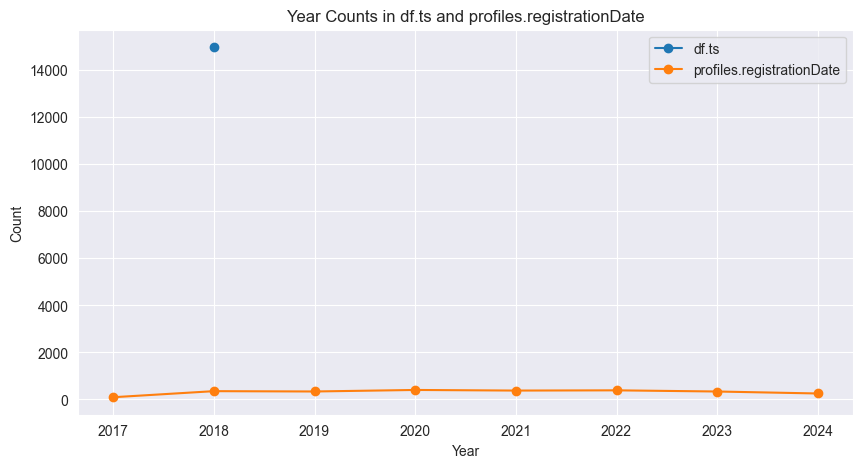

In [227]:
# Extract year using regex
df_ts_4 = df['ts'].str.extract(r'(\d{4})')
profiles_registration_4 = profiles['registration'].str.extract(r'(\d{4})')

# Drop NaNs
df_ts_4.dropna(inplace=True)
profiles_registration_4.dropna(inplace=True)

# Convert extracted years to integers
df_ts_4 = df_ts_4[0].astype(int).value_counts().sort_index()
profiles_registration_4 = profiles_registration_4[0].astype(int).value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 5))

plt.plot(df_ts_4.index, df_ts_4.values, label='df.ts', marker='o')
plt.plot(profiles_registration_4.index, profiles_registration_4.values, label='profiles.registrationDate', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Counts in df.ts and profiles.registrationDate')
plt.legend()
plt.grid(True)
plt.show()

So, all `connections`/`processes` have 2018 year, where in turns, `profiles` registration date is spacely divided from 2017-2024.

So the next analyze (yet TODO) will be provided only with current `df` (`connections`&`processes`) that are also have `mwra` direct relation. 

Let's find a correlation between those attributes:

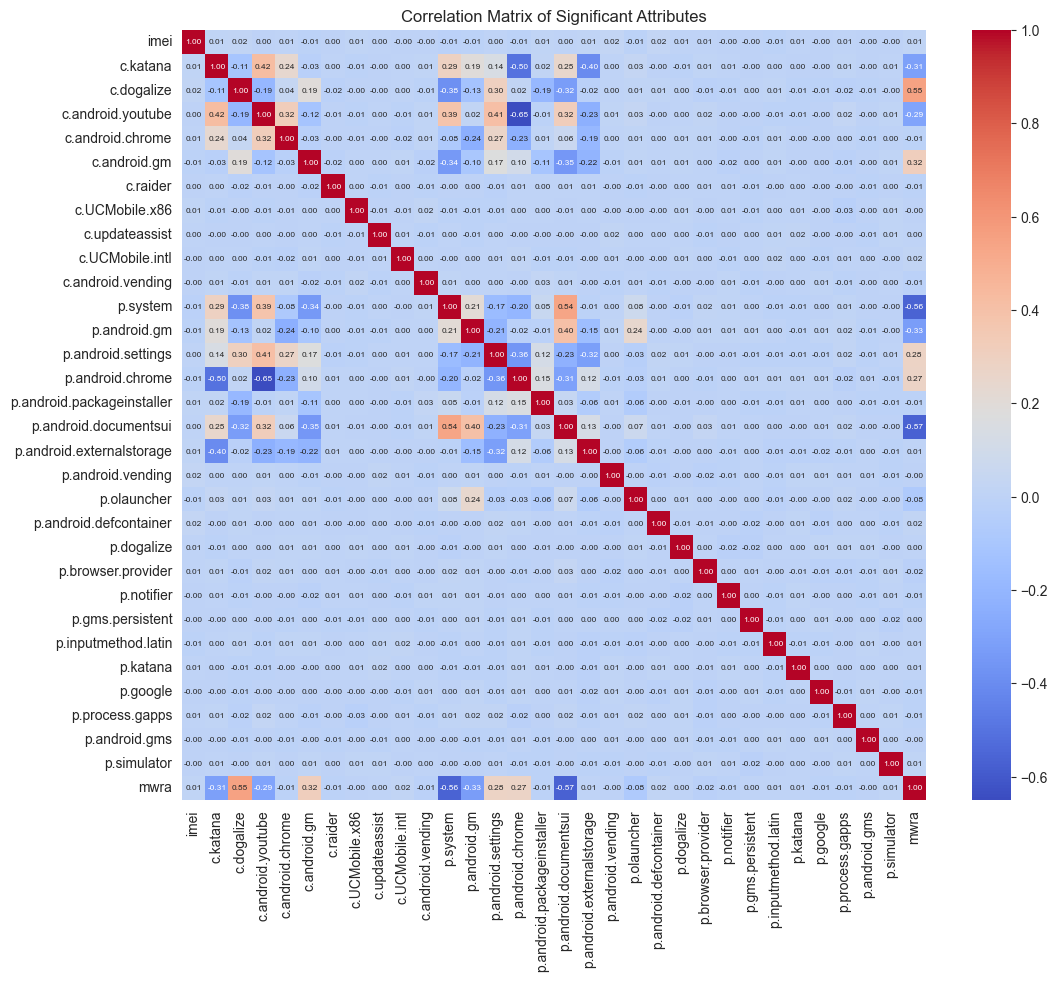


Non-Negligible Correlation of attributes with 'mwra':
c.katana: -0.31 (Moderate correlation, Negative)
c.dogalize: 0.55 (Moderate correlation, Positive)
c.android.youtube: -0.29 (Weak correlation, Negative)
c.android.gm: 0.32 (Moderate correlation, Positive)
p.system: -0.56 (Moderate correlation, Negative)
p.android.gm: -0.33 (Moderate correlation, Negative)
p.android.settings: 0.28 (Weak correlation, Positive)
p.android.chrome: 0.27 (Weak correlation, Positive)
p.android.documentsui: -0.57 (Moderate correlation, Negative)
mwra: 1.00 (Strong correlation, Positive)


In [228]:
exclude_columns = ['imei', 'ts']

cols = [col for col in df if col not in exclude_columns]

# Fill missing values with median 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df[numerical_cols].corr()

# Extract correlation of all features with 'mwra'
mwra_corr = corr_matrix['mwra']  # Remove self-correlation

# Display the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix of Significant Attributes')
plt.show()


# - _|0.00 - 0.10|: Negligible correlation_
# - _ | 0.10 - 0.30 |: Weak correlation_
# - _ | 0.30 - 0.50 |: Moderate correlation_
# - _ | 0.50 - 1.00 |: Strong correlation_

def categorize_correlation(corr_value):
    if corr_value == 0:
        return "No correlation"
    elif 0 < abs(corr_value) <= 0.1:
        return "Negligible correlation"
    elif 0.1 < abs(corr_value) <= 0.3:
        return "Weak correlation"
    elif 0.3 < abs(corr_value) <= 0.7:
        return "Moderate correlation"
    else:
        return "Strong correlation"


# Categorize and print correlations
print("\nNon-Negligible Correlation of attributes with 'mwra':")
for feature, corr_value in mwra_corr.items():
    correlation_type = categorize_correlation(corr_value)

    if correlation_type == "No correlation" or correlation_type == "Negligible correlation":
        continue

    sign = "Positive" if corr_value > 0 else "Negative"
    print(f"{feature}: {corr_value:.2f} ({correlation_type}, {sign})")

In [229]:
exclude_columns = ['imei', 'ts']

cols = [col for col in df if col not in exclude_columns]

# Fill missing values with median 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Perform ANOVA for each numerical column against the target variable 'mwra'
anova_results = {}
for col in numerical_cols:
    if col != 'mwra':
        groups = [group[col].dropna().values for name, group in df.groupby('mwra')]
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[col] = (f_val, p_val)


# Categorize and print significant ANOVA results
def categorize_p_value(p_value):
    if p_value < 0.01:
        return "Highly significant"
    elif p_value < 0.05:
        return "Significant"
    else:
        return "Not significant"


print("\nSignificant ANOVA Results:")
for feature, (f_val, p_val) in anova_results.items():
    significance = categorize_p_value(p_val)
    if significance != "Not significant":
        print(f"{feature}: F-value = {f_val:.2f}, p-value = {p_val:.2e} ({significance})")


Significant ANOVA Results:
c.katana: F-value = 1615.66, p-value = 0.00e+00 (Highly significant)
c.dogalize: F-value = 6654.43, p-value = 0.00e+00 (Highly significant)
c.android.youtube: F-value = 1421.27, p-value = 3.18e-297 (Highly significant)
c.android.gm: F-value = 1667.96, p-value = 0.00e+00 (Highly significant)
c.UCMobile.intl: F-value = 3.92, p-value = 4.78e-02 (Significant)
p.system: F-value = 6893.81, p-value = 0.00e+00 (Highly significant)
p.android.gm: F-value = 1782.89, p-value = 0.00e+00 (Highly significant)
p.android.settings: F-value = 1285.71, p-value = 3.29e-270 (Highly significant)
p.android.chrome: F-value = 1195.26, p-value = 4.70e-252 (Highly significant)
p.android.documentsui: F-value = 7125.43, p-value = 0.00e+00 (Highly significant)
p.olauncher: F-value = 85.62, p-value = 2.47e-20 (Highly significant)
p.browser.provider: F-value = 6.54, p-value = 1.06e-02 (Significant)


So, those attributes we will name as "významné" due to having big impact on `mwra`.

In [230]:
significant_attributes = [
    "c.katana",
    "c.dogalize",
    "c.android.youtube",
    "c.android.gm",
    "c.UCMobile.intl",
    "p.system",
    "p.android.gm",
    "p.android.settings",
    "p.android.chrome",
    "p.android.documentsui",
    "p.olauncher",
    "p.browser.provider",
    "p.android.documentsui",
    "p.system",
    "p.android.gm",
    "c.katana",
    "c.android.youtube",
    "p.android.chrome",
    "p.android.settings",
    "c.android.gm",
    "c.dogalize",
]

#### 1.1.B Analysis of individual attributes: for the selected significant attributes (min 10), analyse their distributions and basic descriptive statistics.


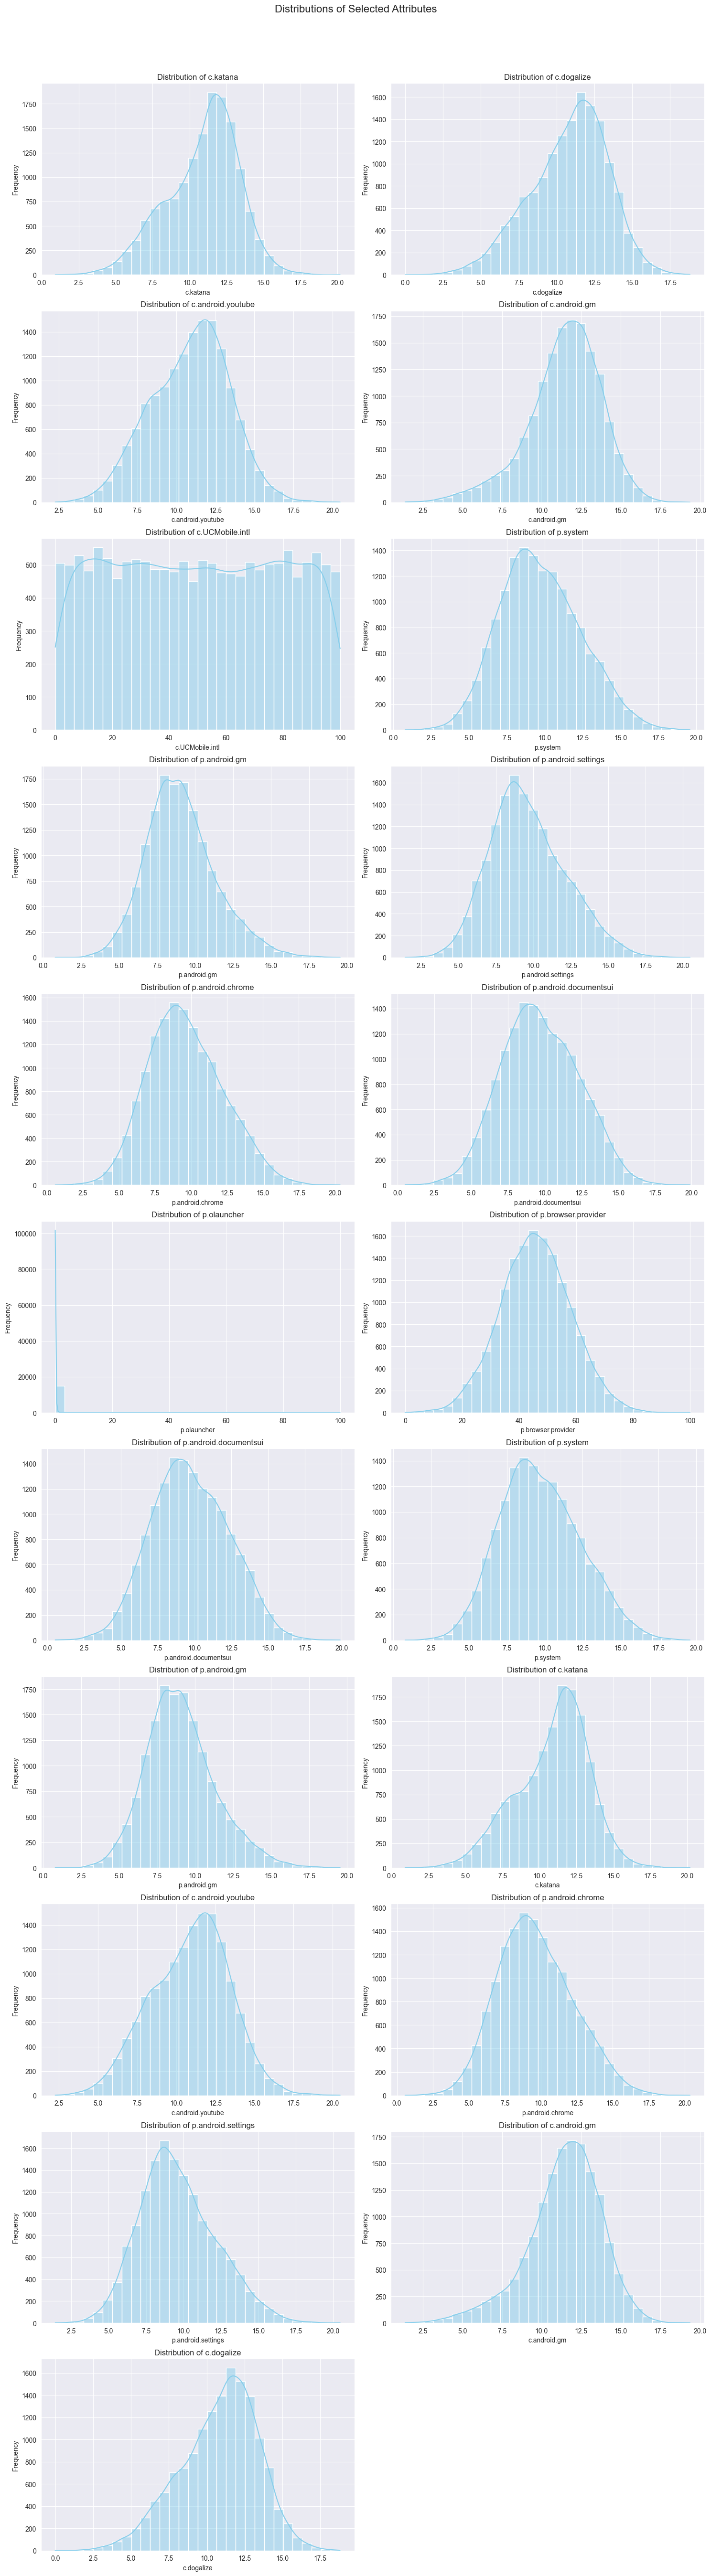

In [231]:
num_attrs = len(significant_attributes)
ncols = 2
nrows = (num_attrs + ncols - 1) // ncols  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each attribute
for i, attr in enumerate(significant_attributes):
    sns.histplot(df[attr], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {attr}')
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add a main title
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle(f'Distributions of Selected Attributes', fontsize=16)

plt.show()

Descriptive Statistics:
            c.katana    c.dogalize  c.android.youtube  c.android.gm  \
count  14975.000000  14975.000000       14975.000000  14975.000000   
mean      10.891413     10.821116          10.901059     11.439875   
std        2.439345      2.566717           2.497378      2.325603   
min        0.918820      0.000000           2.264730      1.381360   
25%        9.328530      9.188920           9.136625     10.164235   
50%       11.289100     11.146840          11.112420     11.666780   
75%       12.600205     12.635725          12.655210     13.000745   
max       20.186330     18.811470          20.479240     19.376290   

       c.UCMobile.intl      p.system  p.android.gm  p.android.settings  \
count     14975.000000  14975.000000  14975.000000        14975.000000   
mean         49.857326      9.729870      9.083810            9.642274   
std          29.025019      2.643675      2.295064            2.536002   
min           0.000000      0.792110      0.7970

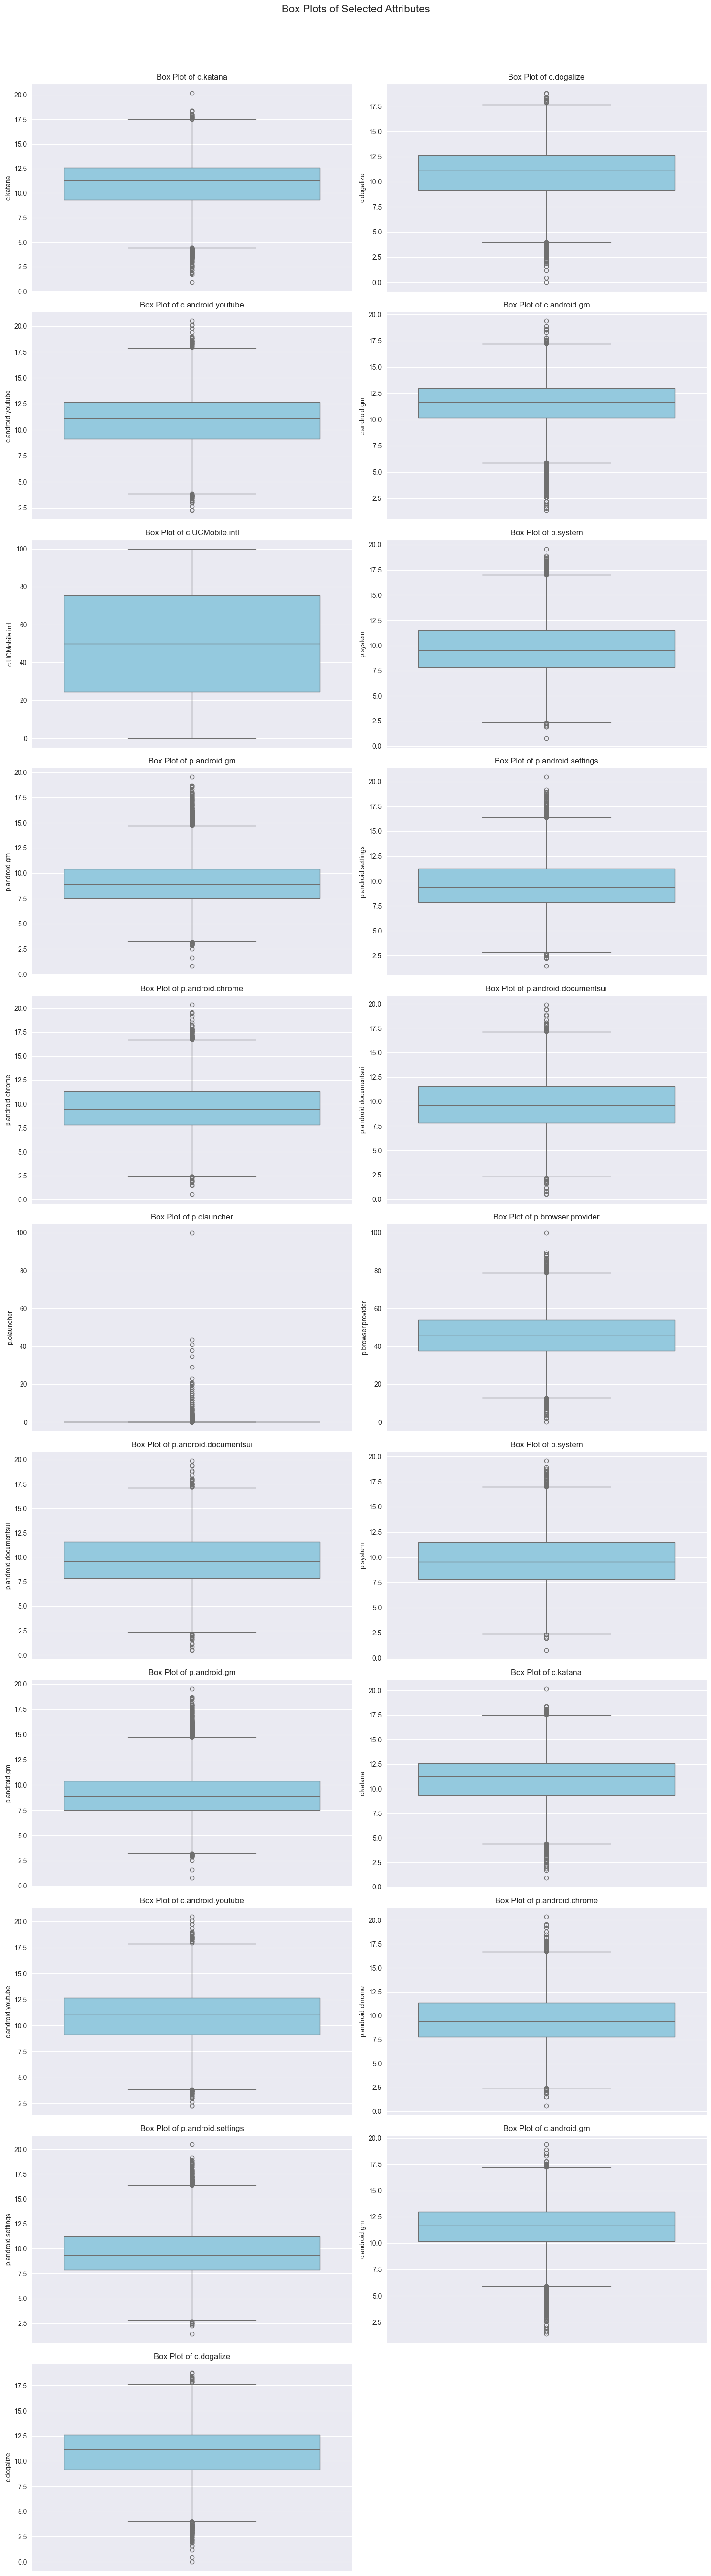

In [232]:
# Calculate descriptive statistics for significant attributes
descriptive_stats = df[significant_attributes].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Plot box plots for significant attributes
num_attrs = len(significant_attributes)
ncols = 2
nrows = (num_attrs + ncols - 1) // ncols  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each attribute
for i, attr in enumerate(significant_attributes):
    sns.boxplot(y=df[attr], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {attr}')
    axes[i].set_ylabel(attr)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add a main title
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle(f'Box Plots of Selected Attributes', fontsize=16)

plt.show()

In [233]:
# Skewness and Kurtosis
skewness = df[significant_attributes].apply(skew).rename('Skewness')
kurt = df[significant_attributes].apply(kurtosis).rename('Kurtosis')
distribution_stats = pd.concat([skewness, kurt], axis=1)
print("Skewness and Kurtosis:\n", distribution_stats)

Skewness and Kurtosis:
                         Skewness     Kurtosis
c.katana               -0.450813     0.001189
c.dogalize             -0.415808    -0.014469
c.android.youtube      -0.165632    -0.189526
c.android.gm           -0.641131     0.770616
c.UCMobile.intl         0.006196    -1.221943
p.system                0.266403    -0.219344
p.android.gm            0.505848     0.474194
p.android.settings      0.394443    -0.036742
p.android.chrome        0.286975    -0.140748
p.android.documentsui   0.115085    -0.271046
p.olauncher            44.689612  2884.646948
p.browser.provider      0.019226     0.029890
p.android.documentsui   0.115085    -0.271046
p.system                0.266403    -0.219344
p.android.gm            0.505848     0.474194
c.katana               -0.450813     0.001189
c.android.youtube      -0.165632    -0.189526
p.android.chrome        0.286975    -0.140748
p.android.settings      0.394443    -0.036742
c.android.gm           -0.641131     0.770616
c.dogalize

### 1.2

#### 1.2.A

As described in the previous steps, we've already removed holistic duplicates. And duplicate stems after merge.

The incorrect format is in multiple columns, like:

- `profiles.current_location` (`(Decimal('-84.5302895'), Decimal('173.686383'))`)
    - Instead of `devices.latitute/longtitude` where coords are stored as float in different columns.
- `profiles.accress` (`87645 Stewart Mills\nSouth Katie, SC 60345`)
-  Different date style formats in `profiles.registration`:
    - 2019-01-09
    - "08/07/2024, 00:00:00"
    - 25 Apr 2024

Appearing NaN values in next columns:

- `profiles.job`
- `profiles.birthdate`
- `profiles.address`
- `profiles.current_location`
- `drvices.code`

#### 1.2.B

In [234]:
# Removing observations with missing data
print(profiles.size, profiles.dropna().size)

30300 3936


Removing all rows with NaN values is unwise, because it goes to losing more than 85% of all data in that dataframe.

In [235]:
# Replace job with "Unknown"
profiles_filled_job = profiles['job'].fillna('Unknown')
print(profiles_filled_job.value_counts())

job
Unknown                     1768
Quantity surveyor              6
Operational researcher         5
Visual merchandiser            5
Newspaper journalist           5
                            ... 
Midwife                        1
Teacher, adult education       1
Community arts worker          1
Accountant, chartered          1
Engineer, communications       1
Name: count, Length: 433, dtype: int64


In [236]:
# Replace it with forward or backward fill
profiles_filled_birthdate = profiles['birthdate'].ffill()
print(profiles_filled_birthdate.value_counts())
profiles_filled_birthdate = profiles['birthdate'].bfill()
print(profiles_filled_birthdate.value_counts())

birthdate
1924-04-23    11
1909-04-17     9
2007-08-11     8
1938-08-25     8
1979-06-24     7
              ..
1955-09-19     1
1979-04-09     1
1976-04-28     1
1965-05-09     1
1973-08-22     1
Name: count, Length: 1364, dtype: int64
birthdate
1981-05-07    11
2010-10-21     9
1996-06-13     8
1978-03-12     7
1935-06-13     7
              ..
1956-11-16     1
1976-04-28     1
1965-05-09     1
1925-06-07     1
1962-01-31     1
Name: count, Length: 1364, dtype: int64


In [237]:
# Use k-Nearest Neighbors (kNN) for categorical data

# Convert categorical column to one-hot encoding
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(profiles[['job']]).toarray())

# Apply kNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_encoded_df = pd.DataFrame(imputer.fit_transform(encoded_df))

# Convert back to original categories if needed
profiles_knn_job = pd.DataFrame(encoder.inverse_transform(imputed_encoded_df), columns=['job'])

print(profiles_knn_job.value_counts())


job                         
Quantity surveyor               6
Visual merchandiser             5
Chief Marketing Officer         5
Magazine journalist             5
Operational researcher          5
                               ..
Warehouse manager               1
Travel agency manager           1
Trade union research officer    1
Toxicologist                    1
Town planner                    1
Name: count, Length: 432, dtype: int64


#### 1.2.C

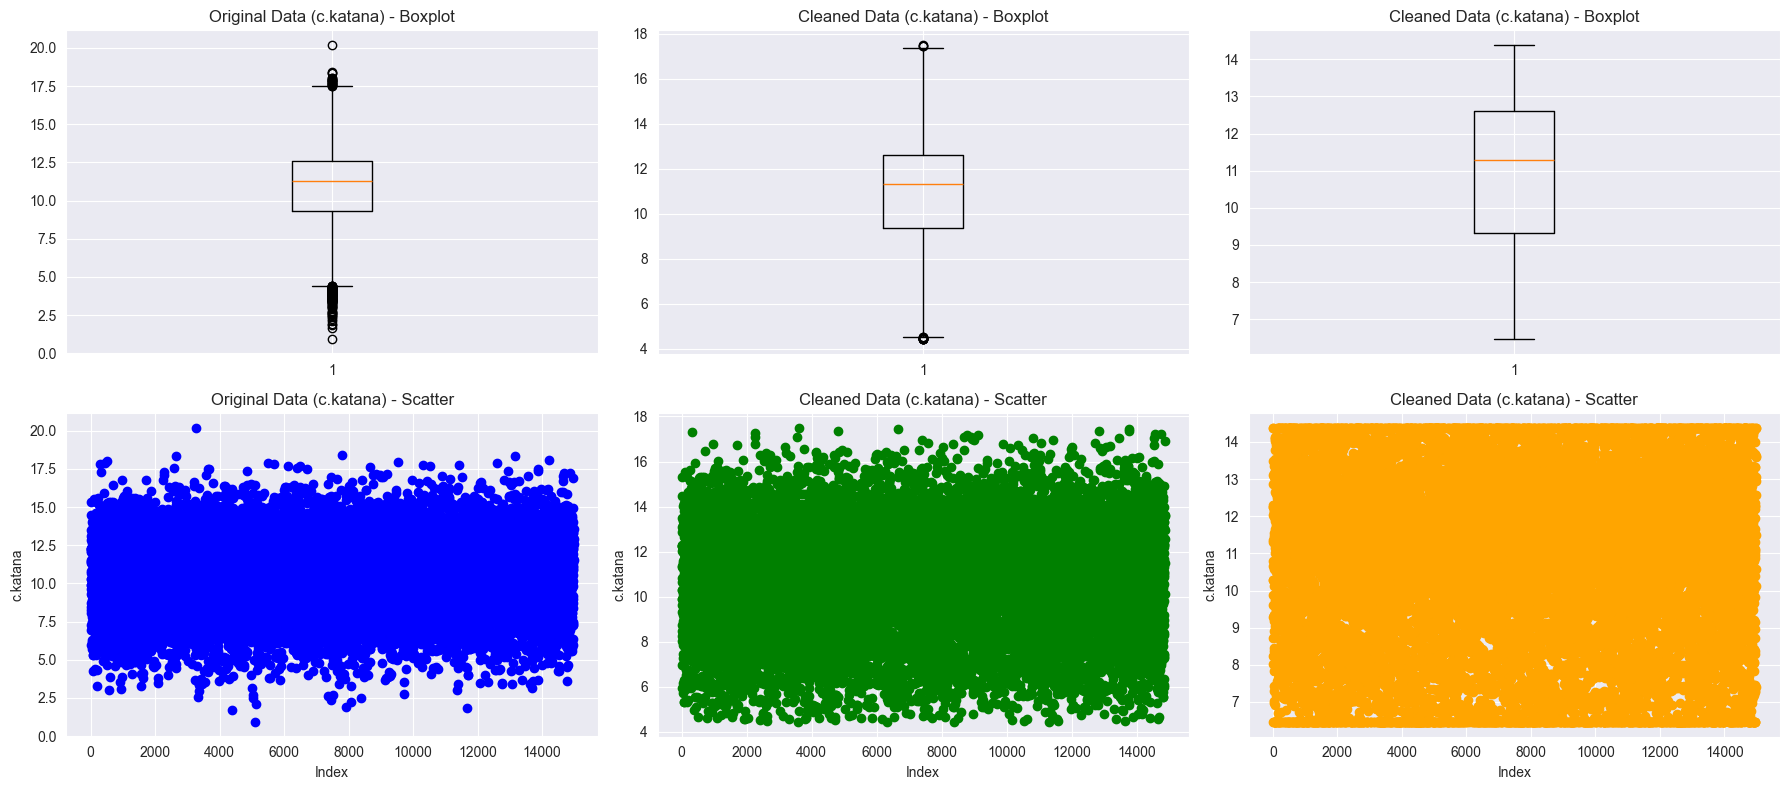

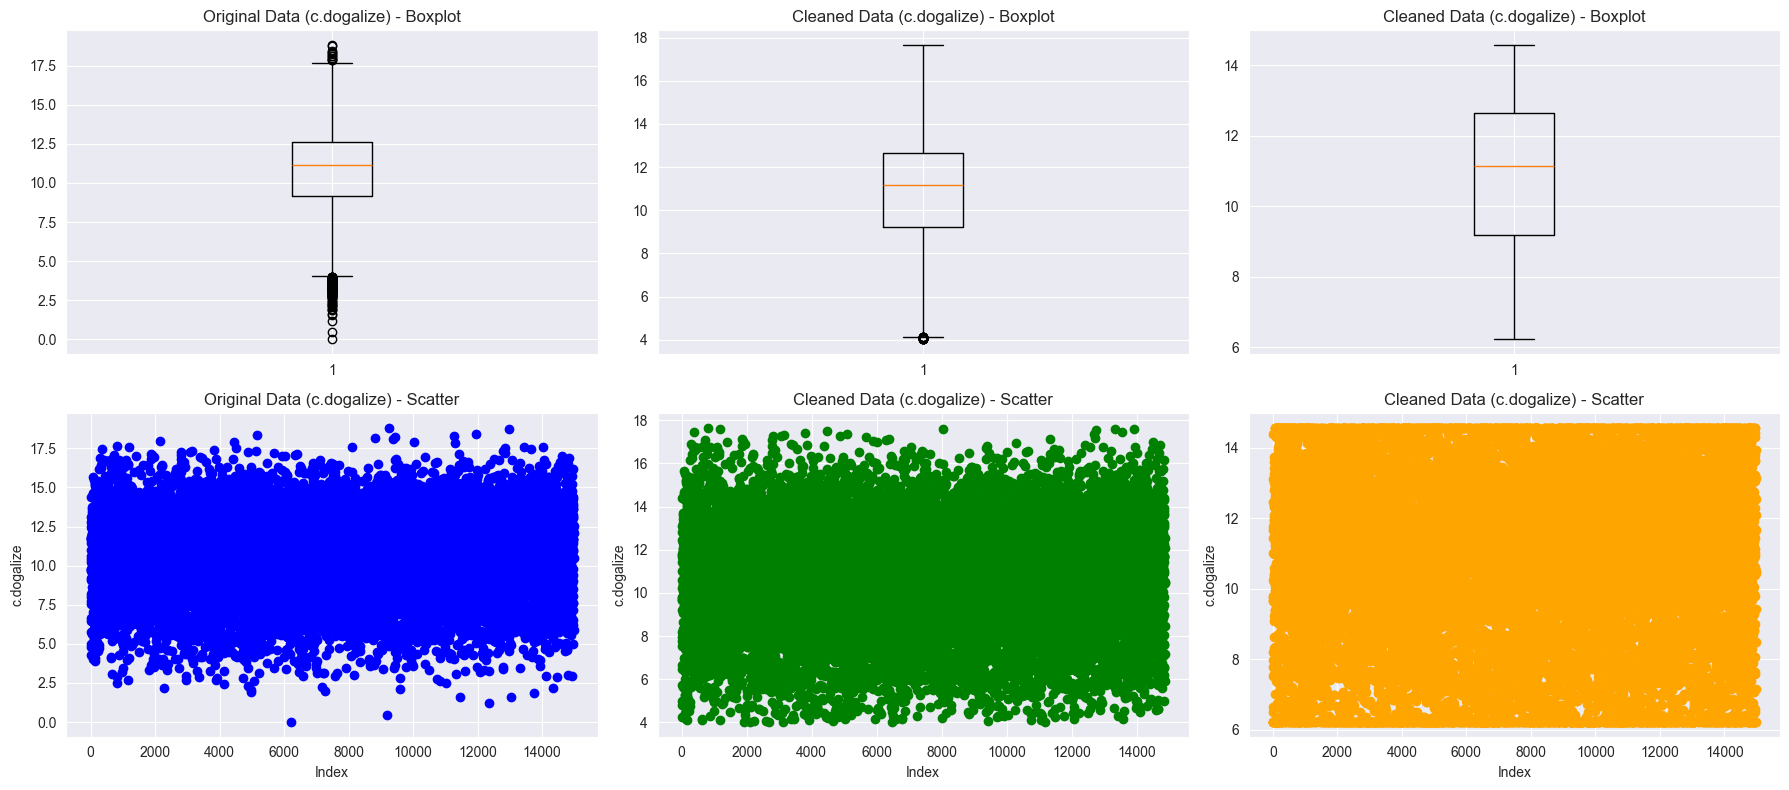

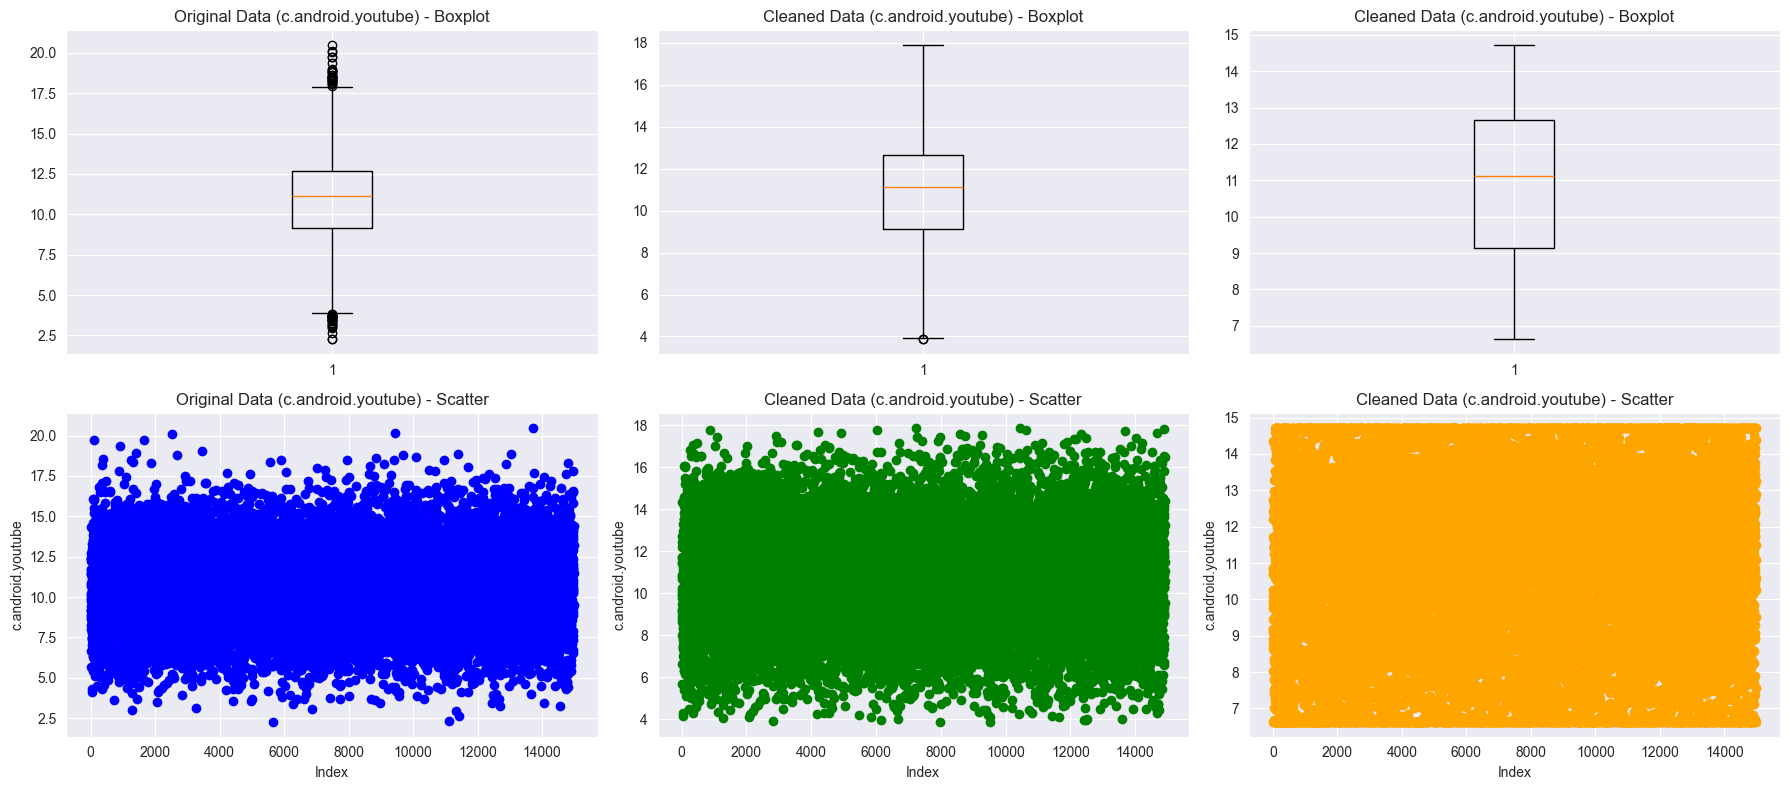

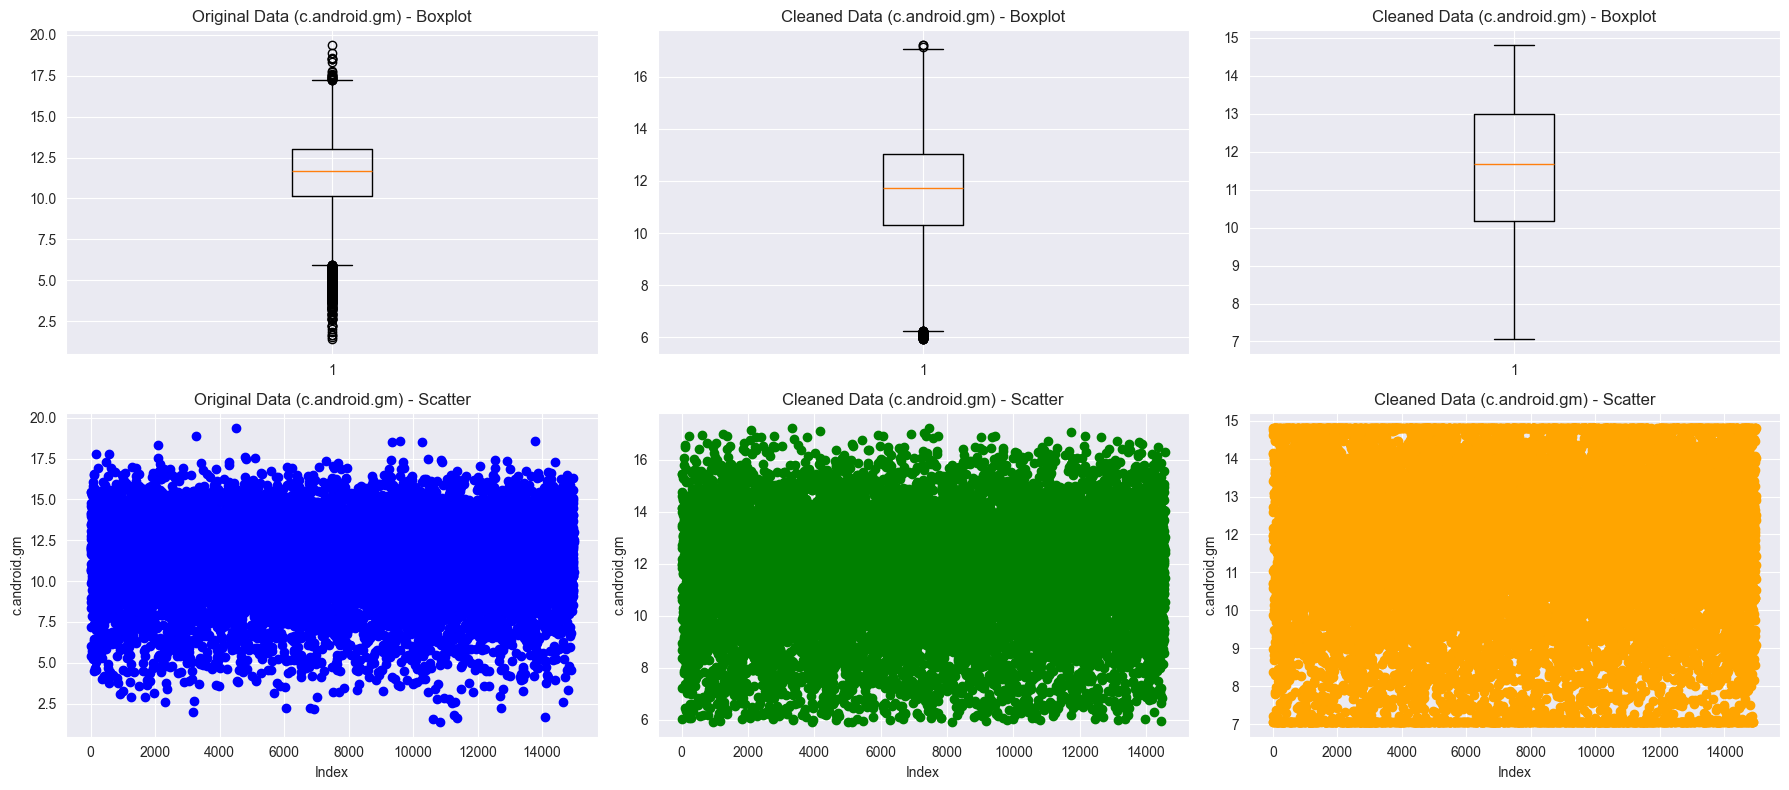

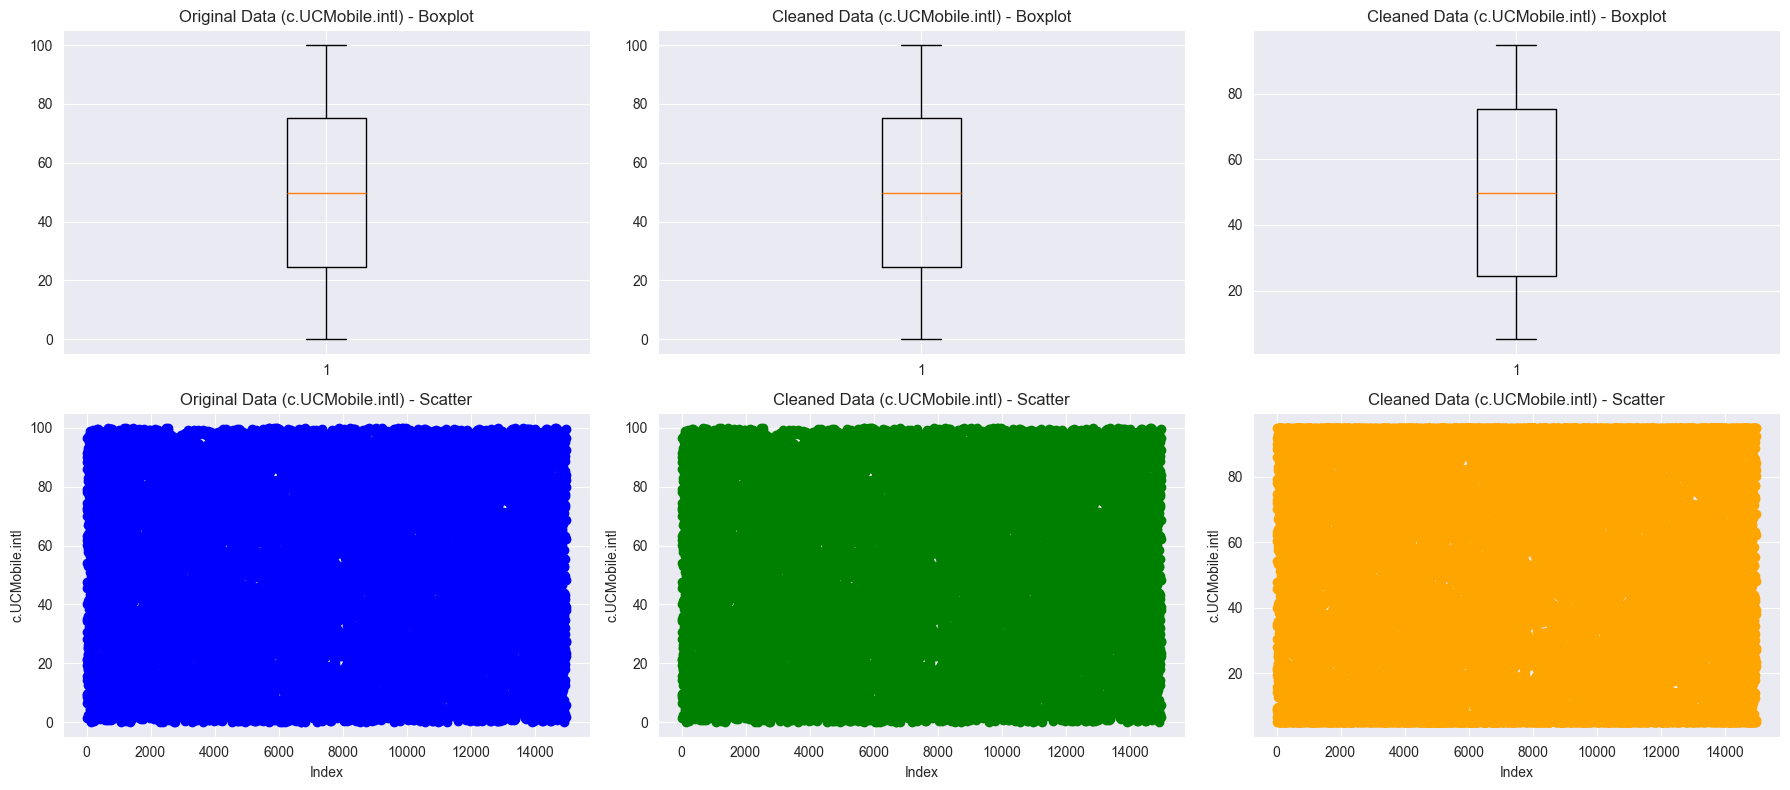

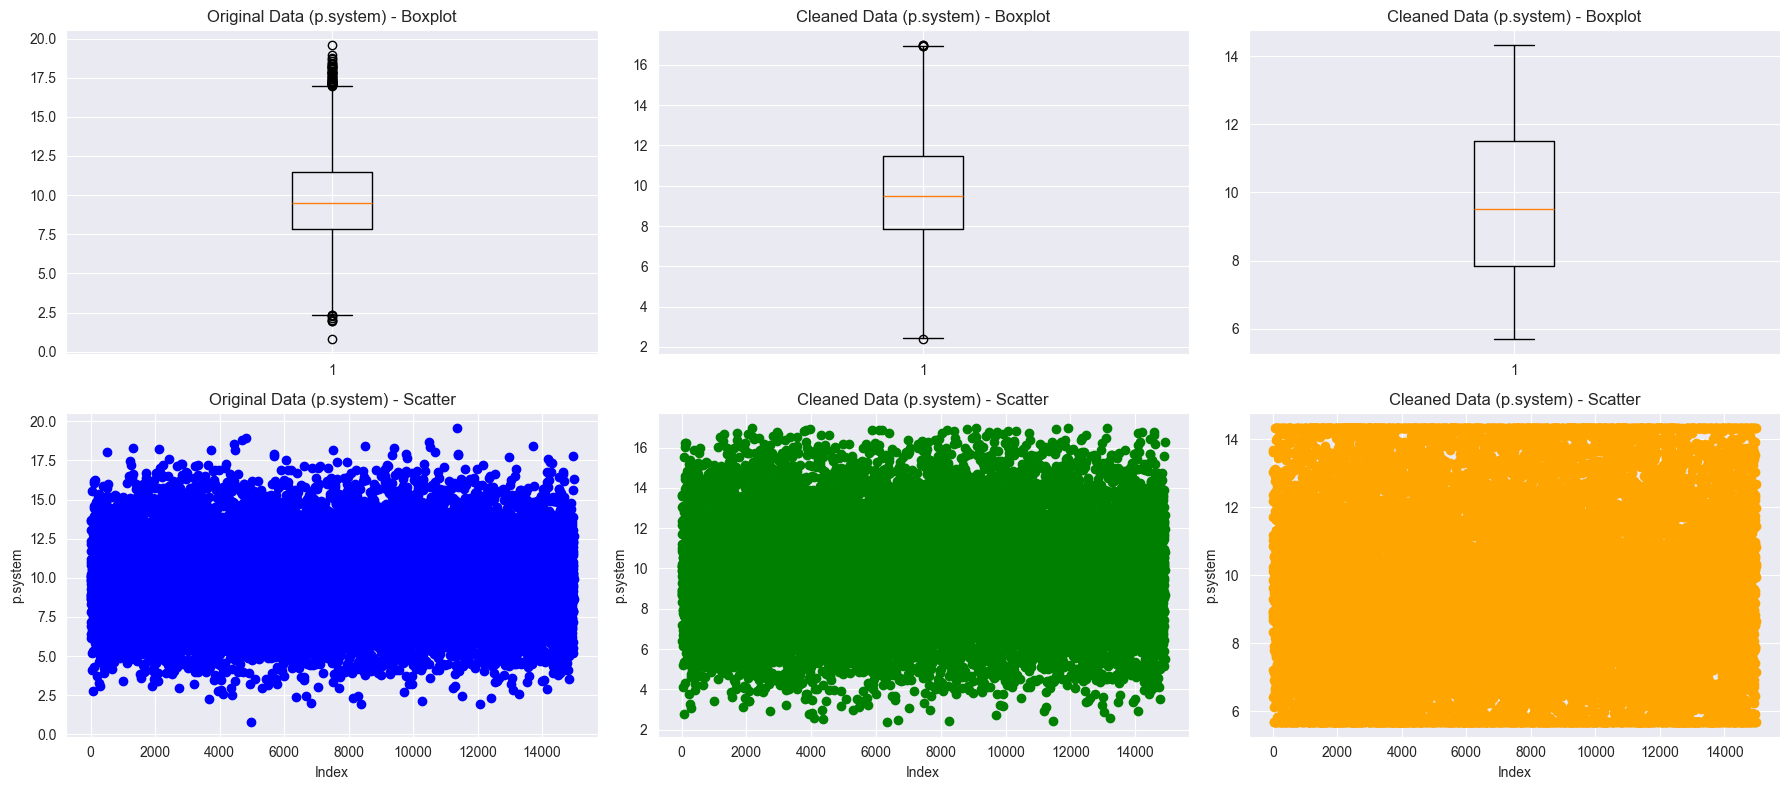

In [238]:
# Function to detect and handle outliers using IQR method
def clean_outliers(_df, column):
    Q1 = _df[column].quantile(0.25)
    Q3 = _df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return _df[(_df[column] >= lower_bound) & (_df[column] <= upper_bound)]


for index, attribute in enumerate(significant_attributes):
    if index > 5:
        break
    
    df_iqr = clean_outliers(df, attribute)
    df_quantile = df[attribute].clip(
        lower=df[attribute].quantile(0.05),
        upper=df[attribute].quantile(0.95)
    )  # >napr. 5%, 95%

    plt.figure(figsize=(18, 8))

    # Boxplot of original data
    plt.subplot(2, 3, 1)
    plt.boxplot(df[attribute])
    plt.title(f'Original Data ({attribute}) - Boxplot')

    # Boxplot of cleaned data with IQR
    plt.subplot(2, 3, 2)
    plt.boxplot(df_iqr[attribute])
    plt.title(f'Cleaned Data ({attribute}) - Boxplot')

    # Boxplot of cleaned data with Quantile
    plt.subplot(2, 3, 3)
    plt.boxplot(df_quantile)
    plt.title(f'Cleaned Data ({attribute}) - Boxplot')

    # Scatter plot of original data
    plt.subplot(2, 3, 4)
    plt.scatter(range(len(df[attribute])), df[attribute], color='blue')
    plt.title(f'Original Data ({attribute}) - Scatter')
    plt.xlabel('Index')
    plt.ylabel(attribute)

    # Scatter plot of cleaned data with IQR
    plt.subplot(2, 3, 5)
    plt.scatter(range(len(df_iqr[attribute])), df_iqr[attribute], color='green')
    plt.title(f'Cleaned Data ({attribute}) - Scatter')
    plt.xlabel('Index')
    plt.ylabel(attribute)

    # Scatter plot of cleaned data with Quantile
    plt.subplot(2, 3, 6)
    plt.scatter(range(len(df_quantile)), df_quantile, color='orange')
    plt.title(f'Cleaned Data ({attribute}) - Scatter')
    plt.xlabel('Index')
    plt.ylabel(attribute)

    plt.tight_layout()
    plt.show()

#### 1.3  Formulation and statistical testing of hypotheses about the data


#### 1.3.A

Looking at the dataset, we noticed that there is a definite correlation between Dogalize and malware. Let's see if there is a difference between connections to the Dogalize application where malware activity was detected versus where it was not.

Let's define our hypotheses as follows:

**$H_0$ (null hypothesis)**:  The number of connections to the Dogalize app **the same** when malware activity was detected.

**$H_1 = H_A$ (alternative hypothesis)**: The number of connections to the Dogalize app **differ/more/less** when malware activity was detected.

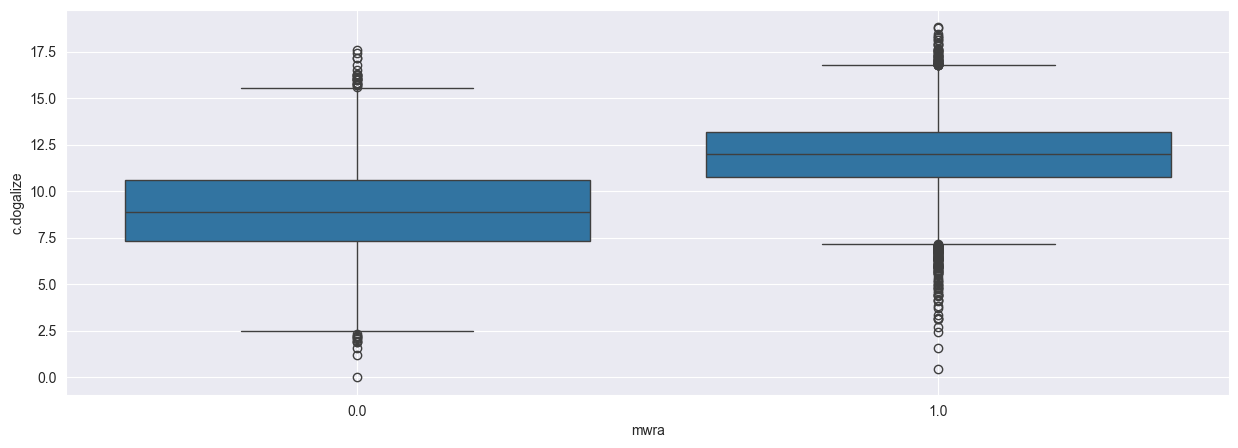

In [239]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.boxplot(x='mwra', y='c.dogalize', data=connections)
plt.grid(True)
plt.show()

Pearson correlation: 0.555


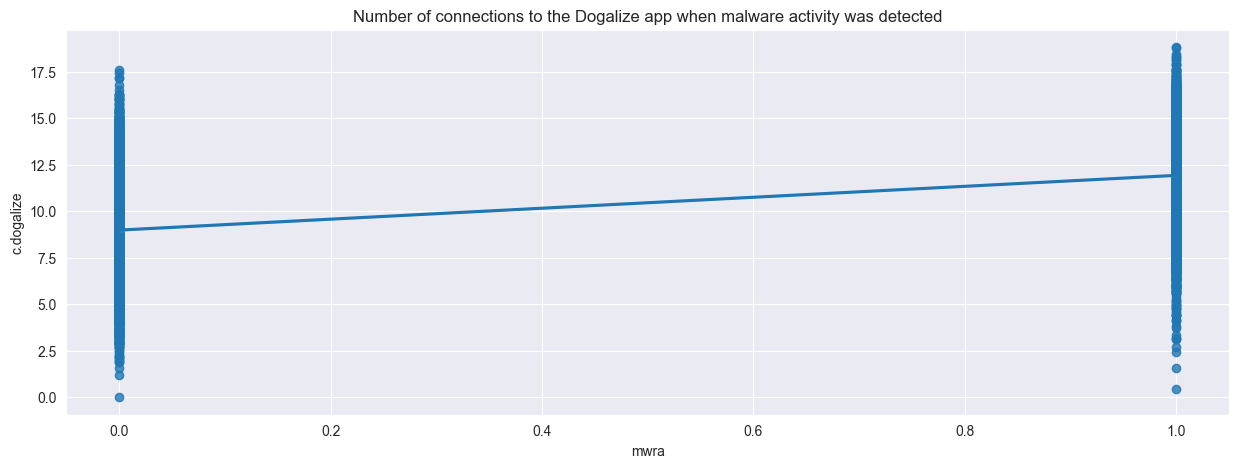

In [240]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.regplot(x="mwra", y="c.dogalize", data=connections)
print("Pearson correlation: %.3f" % connections['mwra'].corr(connections['c.dogalize']))

plt.title('Number of connections to the Dogalize app when malware activity was detected')
plt.grid(True)
plt.show()


When visually comparing, we can notice that there is indeed a difference between c.dogalize with mwra and c.dogalize without mwra. 
But is it statistically significant?

#### Verification of assumptions

##### Assumption of normality of distribution

Let's divide our data into two groups

In [241]:
# Split the data into two groups based on the mwra column
mwra_true = connections[connections['mwra'] == True]
mwra_false = connections[connections['mwra'] == False]

We can check the normality of the distribution visually by using a histogram or a so-called QQ-plane.

Text(0.5, 1.0, 'Distribution of c.dogalize when mwra is False')

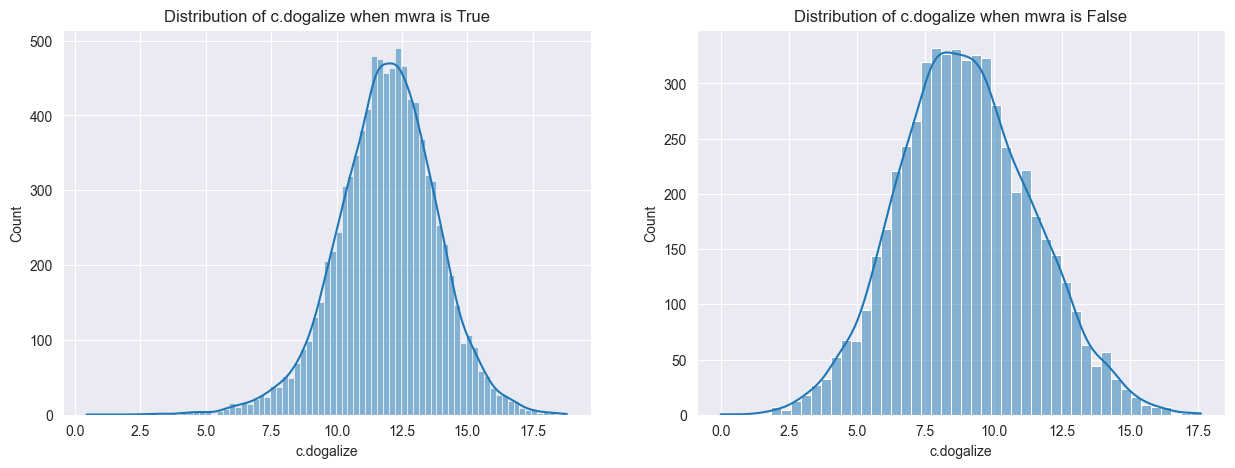

In [242]:
# Plot the distribution of c.dogalize for each group
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(mwra_true['c.dogalize'], ax=axes[0], kde=True)
sns.histplot(mwra_false['c.dogalize'], ax=axes[1], kde=True)
axes[0].set_title('Distribution of c.dogalize when mwra is True')
axes[1].set_title('Distribution of c.dogalize when mwra is False')

In [243]:
# There are some outliers lets clear them.
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)

    return a[(a > upper) | (a < lower)]

# identify outliers
mwra_true_outliers = identify_outliers(mwra_true['c.dogalize'])
mwra_false_outliers = identify_outliers(mwra_false['c.dogalize'])

# number of outliers
print(f'Number of outliers in mwra_true: {mwra_true_outliers.shape[0]}')
print(f'Number of outliers in mwra_false: {mwra_false_outliers.shape[0]}')

# remove outliers
mwra_true = mwra_true.drop(mwra_true_outliers.index)
mwra_false = mwra_false.drop(mwra_false_outliers.index)

Number of outliers in mwra_true: 184
Number of outliers in mwra_false: 35


Text(0.5, 1.0, 'Distribution of c.dogalize when mwra is False')

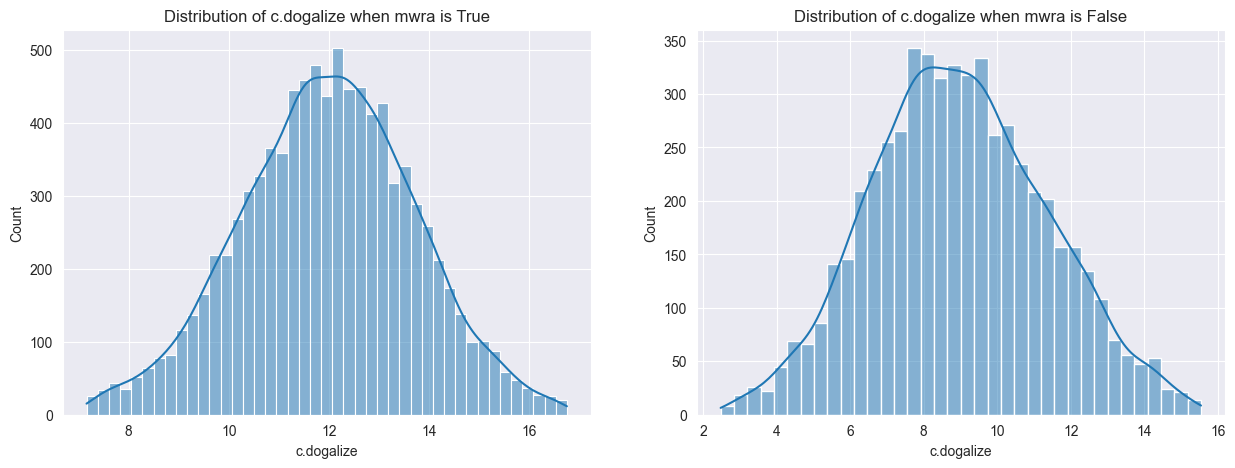

In [244]:
# Plot the distribution of c.dogalize for each group after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(mwra_true['c.dogalize'], ax=axes[0], kde=True)
sns.histplot(mwra_false['c.dogalize'], ax=axes[1], kde=True)
axes[0].set_title('Distribution of c.dogalize when mwra is True')
axes[1].set_title('Distribution of c.dogalize when mwra is False')

Text(0.5, 1.0, 'Q-Q plot of c.dogalize when mwra is False')

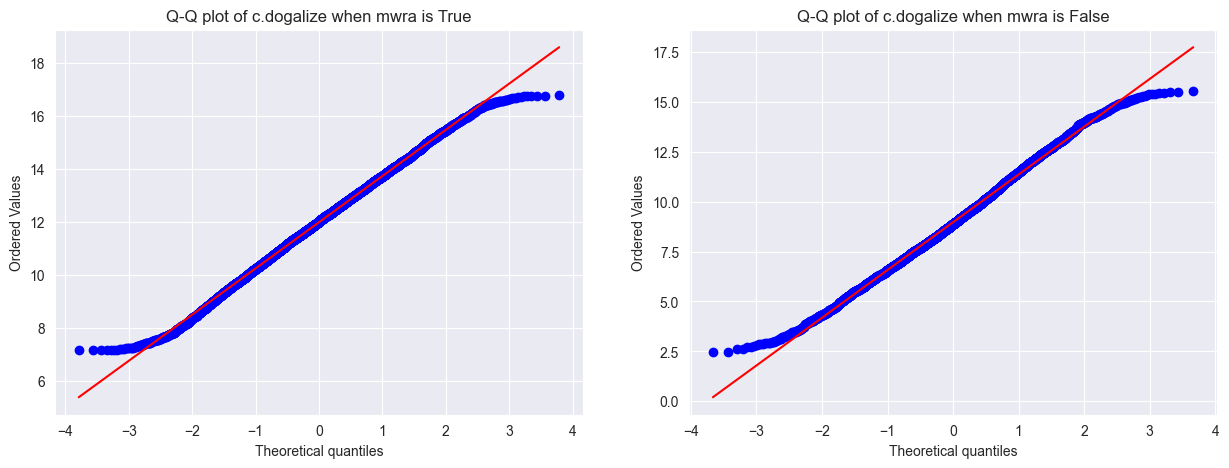

In [245]:
# Check the normality of the distribution using Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(mwra_true['c.dogalize'], dist="norm", plot=axes[0])
stats.probplot(mwra_false['c.dogalize'], dist="norm", plot=axes[1])
axes[0].set_title('Q-Q plot of c.dogalize when mwra is True')
axes[1].set_title('Q-Q plot of c.dogalize when mwra is False')

Both data sets show deviations from the normal distribution with similar skewness and kurtosis properties, which may indicate similar distributions. However, additional tests such as the Kolmogorov-Smirnov (K-S) test can be performed to compare the empirical distributions of the two groups to draw definitive conclusions about the similarity of the distributions.


#### Kolmogorov-Smirnov normality test


In [246]:


# Standardize the data
mrwa_standardized_true = (mwra_true['c.dogalize'] - np.mean(mwra_true['c.dogalize'])) / np.std(mwra_true['c.dogalize'])
mrwa_standardized_false = (mwra_false['c.dogalize'] - np.mean(mwra_false['c.dogalize'])) / np.std(mwra_false['c.dogalize'])


Before we move on to the test, we need to standardize the data. We will use the Z-score standardization method, which transforms the data to have a mean of 0 and a standard deviation of 1.

Let's test the normality of the distribution using the Kolmogorov-Smirnov test.

If p < 0.05, we reject the null hypothesis $H_0$ and the data probably have a non-normal distribution. If p > 0.05, we do not reject the null hypothesis $H_0$, i.e., based on the data, we cannot claim that the data belong to a distribution other than normal.



In [247]:
# Perform the Kolmogorov-Smirnov test for normality
ks_test = stats.kstest(mrwa_standardized_true, 'norm')
print(f'Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}')

Kolmogorov-Smirnov Test: Statistic=0.010438620186298764, p-value=0.2680993253158367


In [248]:
# Perform the Kolmogorov-Smirnov test for normality
ks_test = stats.kstest(mrwa_standardized_false, 'norm')
print(f'Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}')

Kolmogorov-Smirnov Test: Statistic=0.01950247446821718, p-value=0.028348139124885763


Based on the results we can see that in the test with data where malware was detected the distribution is normal (mrwa_standardized_true). But in the test with dates where no malware was detected, the distribution is not normal (mrwa_standardized_false).

#### Similarity of variance

Also, to perform statistical tests, we need to know the variance of our groups. We can use the Levene test to check if the variances are equal.


In [249]:
# Perform Levene's test for the equality of variances
levene_test = stats.levene(mrwa_standardized_true, mrwa_standardized_false)
print(f'Levene Test: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}')

Levene Test: Statistic=0.40842237282264265, p-value=0.5227812558112312


By inspection, we proved that the data has the same variance.

#### Statistical tests

After doing all the necessary preparation we calculated that one of the data groups is not part of the normal distribution. As a result, we cannot use parametric tests. We will use non-parametric tests such as Mann-Whitney U-test and Kruskal-Wallis H-test.

#### Mann-Whitney U-test



In [250]:
# Perform the Mann-Whitney U test 
man_test = stats.mannwhitneyu(mrwa_standardized_true, mrwa_standardized_false)
print(f'Mann-Whitney U Test: Statistic={man_test.statistic}, p-value={man_test.pvalue}')

Mann-Whitney U Test: Statistic=25889649.0, p-value=0.24419029469253595


#### Kruskal-Wallis H-test

In [251]:
# Perform the Kruskal-Wallis H-test
kr_test = stats.kruskal(mrwa_standardized_true, mrwa_standardized_false)
print(f'Kruskal-Wallis H Test: Statistic={kr_test.statistic}, p-value={kr_test.pvalue}')

Kruskal-Wallis H Test: Statistic=1.3562440209531708, p-value=0.24418948767182938


#### Conclusion

Based on the results of the Mann-Whitney U-test and Kruskal-Wallis H-test, we can conclude that p_value > 0.05 and the $H_0$ is true (we reject $H_1$). Each of the tests proved this to be true.

### 1.3.B

#### Check whether statistical tests have enough support from the data, i.e. whether they have sufficiently strong statistical power.

To prove statistical power we can look at the amount of data we use.

In [252]:
mwra_true['c.dogalize'].size

9178

In [253]:
mwra_false['c.dogalize'].size

5578

We can also recognize this from the difference between the K-S test samples.

#### Conclusion

Based on the results, we can tell that the statistical power is strong enough to support the results.